In [1]:
import pandas as pd
from pathlib import Path

# === 1. List of input files ===
files = [
    "gen_hourly_MW_2022.csv",
    "gen_hourly_MW_2023.csv",
    "gen_hourly_MW_2024.csv"
]

# === 2. Read and concatenate ===
dfs = []
for f in files:
    if Path(f).exists():
        df = pd.read_csv(f)
        dfs.append(df)
    else:
        print(f"Warning: file not found -> {f}")

# Combine all available data
combined = pd.concat(dfs, ignore_index=True)

# === 3. Sort by datetime column (optional but recommended) ===
#if "datetime" in combined.columns:
#    combined["datetime"] = pd.to_datetime(combined["datetime"], errors="coerce")
#    combined = combined.sort_values("datetime").reset_index(drop=True)

# === 4. Save to new file ===
combined.to_csv("gen_hourly_MW_all.csv", index=False)

print("✅ Combined file saved as gen_hourly_MW_all.csv")
print(combined.head())

✅ Combined file saved as gen_hourly_MW_all.csv
              datetime    Area Production Type  Generation (MW)
0  2022-01-01 00:00:00  BZN|ES         Biomass            526.0
1  2022-01-01 01:00:00  BZN|ES         Biomass            533.0
2  2022-01-01 02:00:00  BZN|ES         Biomass            524.0
3  2022-01-01 03:00:00  BZN|ES         Biomass            532.0
4  2022-01-01 04:00:00  BZN|ES         Biomass            528.0


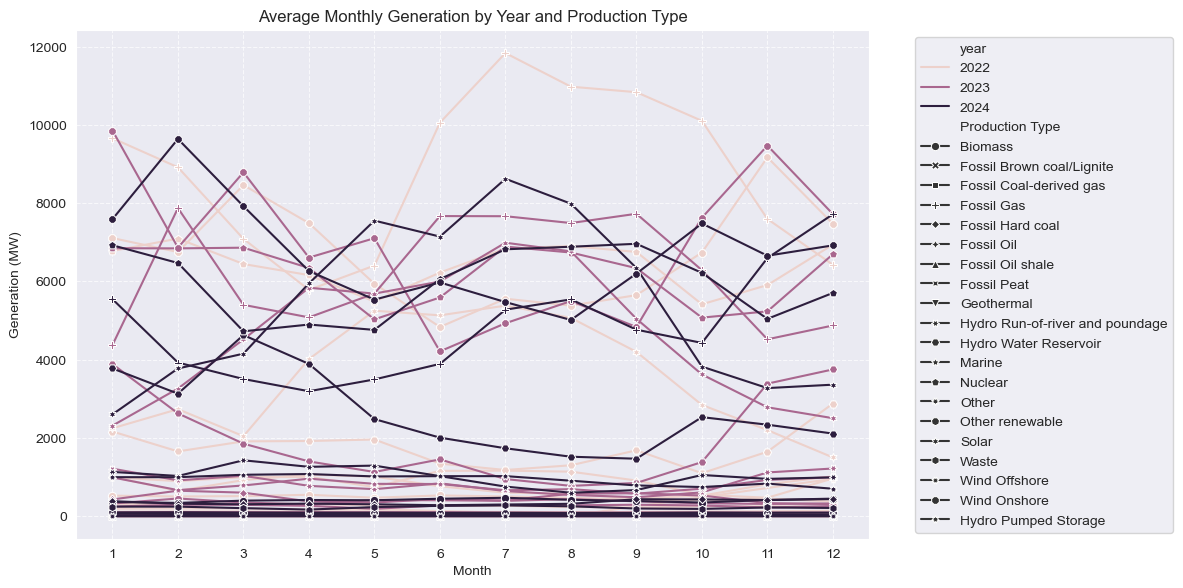

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Read the combined data
df = pd.read_csv("gen_hourly_MW_all.csv")

# Convert datetime to pandas datetime
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract year and month
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month

# Calculate monthly average generation for each year
monthly_avg = df.groupby(['year', 'month', 'Production Type'])['Generation (MW)'].mean().reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg, 
            x='month',
            y='Generation (MW)',
            hue='year',
            style='Production Type',
            markers=True,
            dashes=False)

# Customize the plot
plt.title('Average Monthly Generation by Year and Production Type')
plt.xlabel('Month')
plt.ylabel('Generation (MW)')
plt.grid(True, linestyle='--', alpha=0.7)

# Format x-axis to show all months
plt.xticks(range(1, 13))

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()